## MOM025 Wed Poly Maude Rise wind isolation

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

fh=fcor/ht
print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape


(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.9.6


In [4]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/'


In [5]:
#plot wind stress
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tau_x.shape
cntrl_tx=ff.tau_x.load()
cntrl_ty=ff.tau_y.load()

Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tau_x.shape
pert_tx=ff.tau_x.load()
pert_ty=ff.tau_y.load()
print pert_tx.shape

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 1080, 1440)
(20, 1080, 1440)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/tau_x.pdf


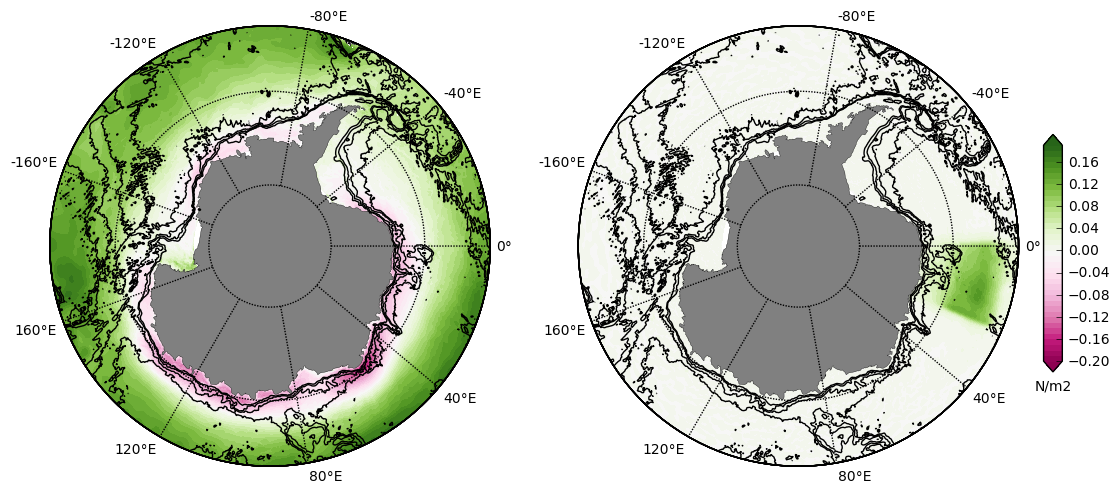

In [6]:

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.2,.01)

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

#clev = np.arange(-.1,.1,.01)

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pert_tx[0]-cntrl_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Zonal Wind Stress Anomaly')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

of = os.path.join(NYFPertDir,'tau_x.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'tau_x.png')
plt.savefig(of,dpi=220)


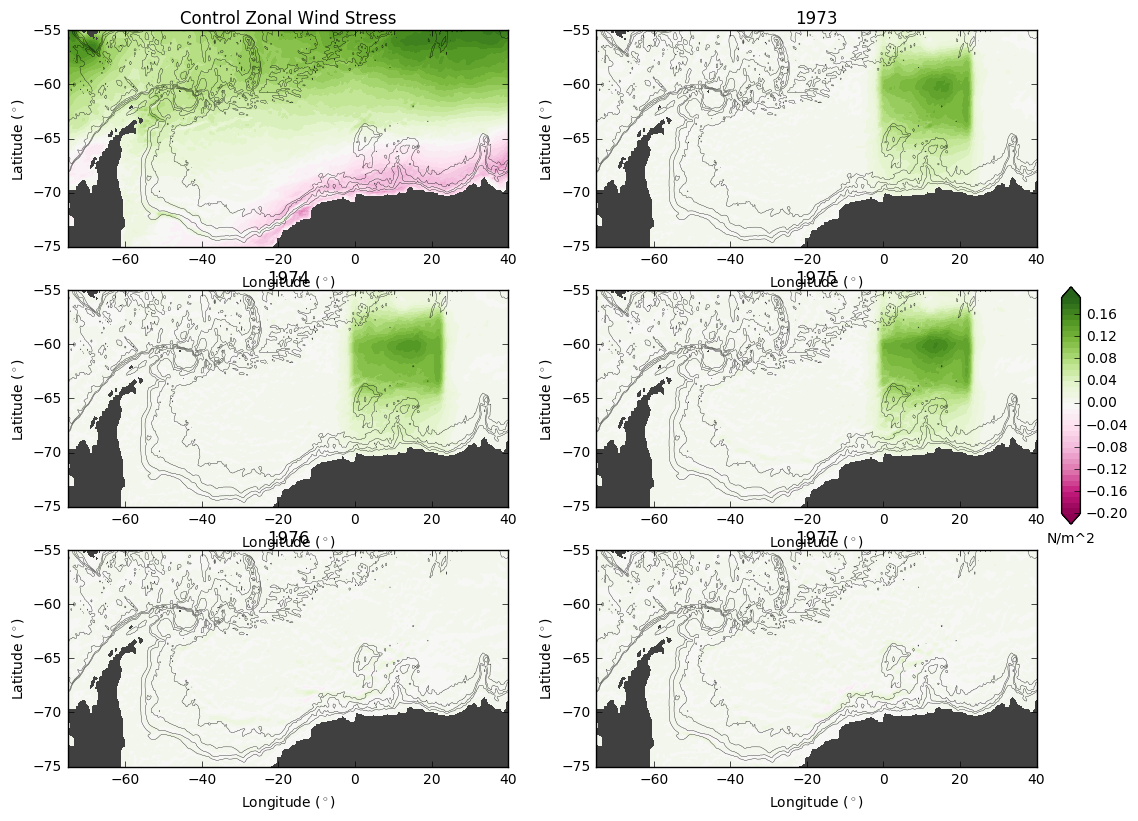

In [7]:
clev = np.arange(-.2,.2,.01)
clev3 = np.arange(0,5000,1000)

plt.subplot(321)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,cntrl_tx[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m^2')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-55))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.xlim([-75,40])
plt.title('Control Zonal Wind Stress')


yrs=['1973','1974','1975','1976','1977','1978']

ii=0
for yr in range(0,5):
    
    #print yr
    plt.subplot(3,2,yr+2)
    plt.gca().patch.set_color('.25')
    p1=plt.contourf(xt_ocean,yt_ocean,pert_tx[yr]-cntrl_tx[yr],cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('N/m^2')
    clev3 = np.arange(0,5000,1000)
    plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-75,-55))
    plt.xlabel('Longitude ($^\circ$)')
    plt.ylabel('Latitude ($^\circ$)')
    plt.xlim([-75,40])
    plt.title(yrs[yr])
    
    #ii+=12
    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m^2')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)


In [8]:
#plot wind stress curl ... Ekman pumping anomalies.
#(d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0

#drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
#print drhodx.shape

print cntrl_tx.shape
cntrl_Txf=cntrl_tx[0]/fcor
cntrl_Tyf=cntrl_ty[0]/fcor
print cntrl_Txf.shape

cntrl_dTyfdx=np.gradient(cntrl_Tyf,dxt,axis=1)
print cntrl_dTyfdx.shape
cntrl_dTxfdy=np.gradient(cntrl_Txf,dyt,axis=0)
print cntrl_dTxfdy.shape

rho0=1035.0
cntrl_we=(cntrl_dTyfdx-cntrl_dTxfdy)/rho0


print pert_tx.shape
pert_Txf=pert_tx[0]/fcor
pert_Tyf=pert_ty[0]/fcor
print pert_Tyf.shape

pert_dTyfdx=np.gradient(pert_Tyf,dxt,axis=1)
print pert_dTyfdx.shape
pert_dTxfdy=np.gradient(pert_Txf,dyt,axis=0)
print pert_dTxfdy.shape

rho0=1035.0
pert_we=(pert_dTyfdx-pert_dTxfdy)/rho0



(20, 1080, 1440)
(1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: divide by zero encountered in divide
  if not reflexive
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


(1080, 1440)
(1080, 1440)
(20, 1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)


In [9]:
m=np.nanmax(cntrl_we[0:300,:])
print m
m=np.nanmin(cntrl_we[0:300,:])
print m

m=np.nanmax(pert_we[0:300,:])
print m
m=np.nanmin(pert_we[0:300,:])
print m

#convert from m/s to m/day
s_day=60*60*24
print s_day
cntrl_we=cntrl_we*s_day
pert_we=pert_we*s_day

m=np.nanmax(cntrl_we[0:300,:])
print m
m=np.nanmin(cntrl_we[0:300,:])
print m

m=np.nanmax(pert_we[0:300,:])
print m
m=np.nanmin(pert_we[0:300,:])
print m


5.48465345083e-05
-5.95456750148e-05
5.43178069702e-05
-6.1956084454e-05
86400
4.73874058152
-5.14474632128
4.69305852223
-5.35300569683


/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/we.pdf


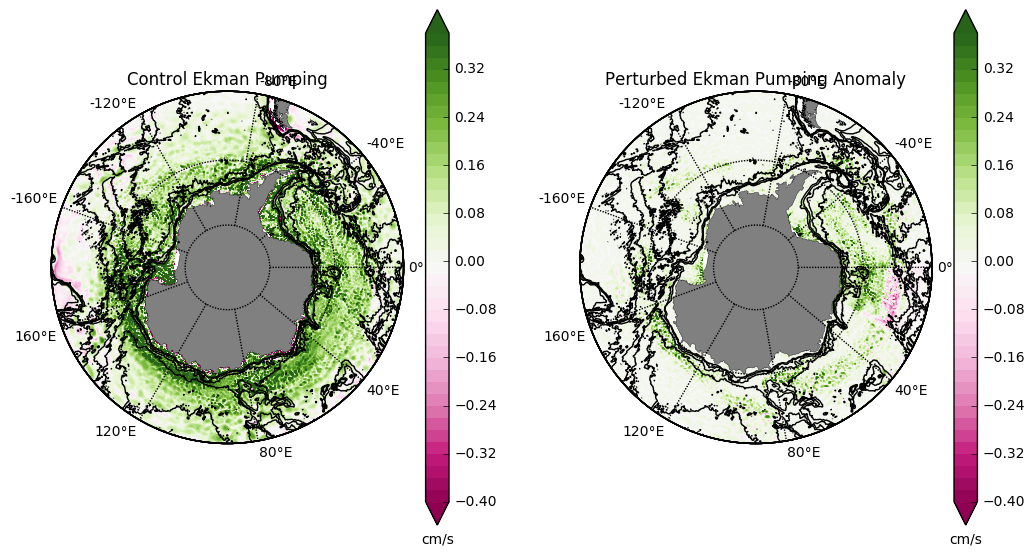

In [10]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.4,.4,.02)

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-50,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_we, cmap=plt.cm.PiYG, levels=clev,extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm/s')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Control Ekman Pumping')


plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-50,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pert_we-cntrl_we, cmap=plt.cm.PiYG, levels=clev,extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm/s')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Perturbed Ekman Pumping Anomaly')


#of = os.path.join(NYFPertDir,'we.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'we.png')
plt.savefig(of,dpi=220)


In [11]:
#plot stamps of sea ice concentration.
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ice_*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
nyf_cn=ff.CN.sum('ct').load()
print nyf_cn.shape

Ocean_File = os.path.join(NYFPertDir,'output5*/ice_*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
pert_cn=ff.CN.sum('ct').load()
print pert_cn.shape

print nyf_cn.shape
print pert_cn.shape
cn = np.concatenate((nyf_cn[0:12,:],pert_cn),axis=0)
print cn.shape


(240, 5, 1080, 1440)
(240, 1080, 1440)
(240, 5, 1080, 1440)
(240, 1080, 1440)
(240, 1080, 1440)
(240, 1080, 1440)
(252, 1080, 1440)


['June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.']
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/cn.pdf


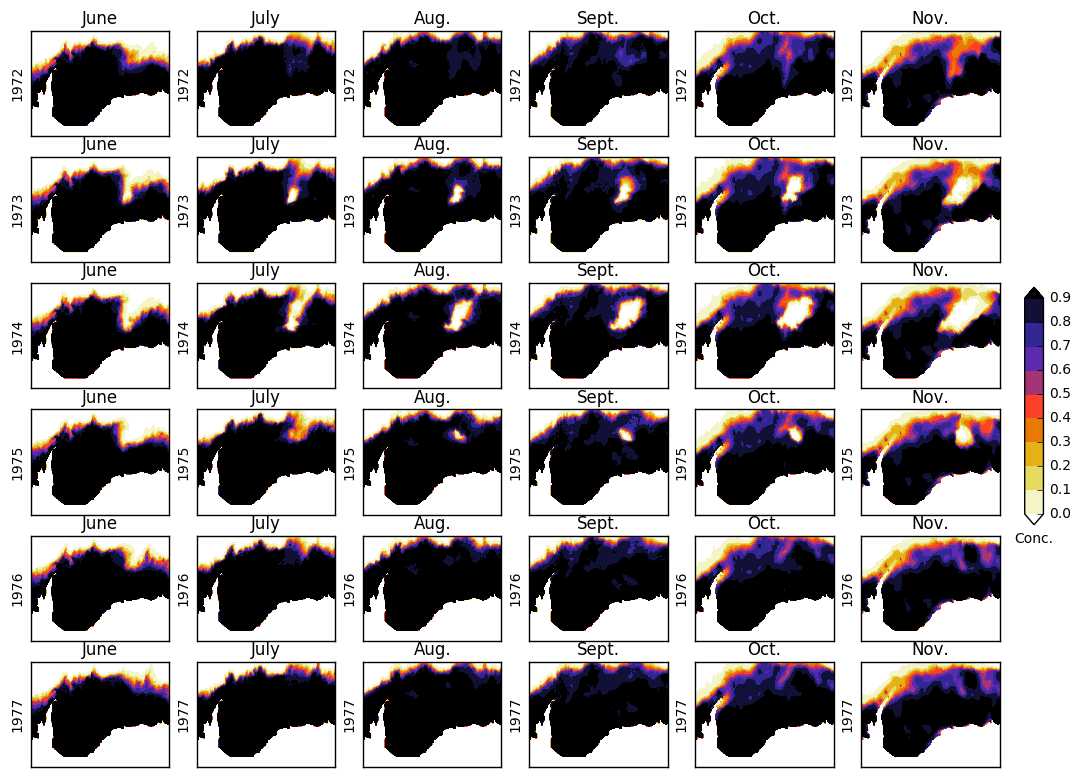

In [12]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.2,.01)
clev3 = np.arange(0,5000,1000)

tits=['June','July','Aug.','Sept.','Oct.', 'Nov.']
yrs=['1972','1973','1974','1975','1976','1977']
print tits

ii=0
for yr in range(0,6):
    #print yr
    for i in range(5,11): 
        
        #print yr*12+i
    
        clev = np.arange(0,1,.1)
        plt.subplot(6,6,ii+1)
        plt.gca().patch.set_color('.25')
        p1=plt.contourf(xt_ocean,yt_ocean,pert_cn[yr*12+i,:,:],cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
        #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
        #cb.ax.set_xlabel('Conc.')
        #clev3 = np.arange(0,5000,1000)
        #plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
        plt.gca().yaxis.set_major_formatter(x_formatter)
        plt.ylim((-80,-55))
        #plt.xlabel('Longitude ($^\circ$)')
        plt.ylabel(yrs[yr])
        plt.xlim([-80,40])
        plt.title(tits[i-5])     
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        
        ii+=1

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Conc.')

of = os.path.join(NYFPertDir,'cn.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'cn.png')
plt.savefig(of,dpi=220)


In [13]:
#Plot MLD
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.mld.shape
cntrl_mld=ff.mld.load()

Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.mld.shape
pert_mld=ff.mld.load()


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 1080, 1440)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/mld.pdf


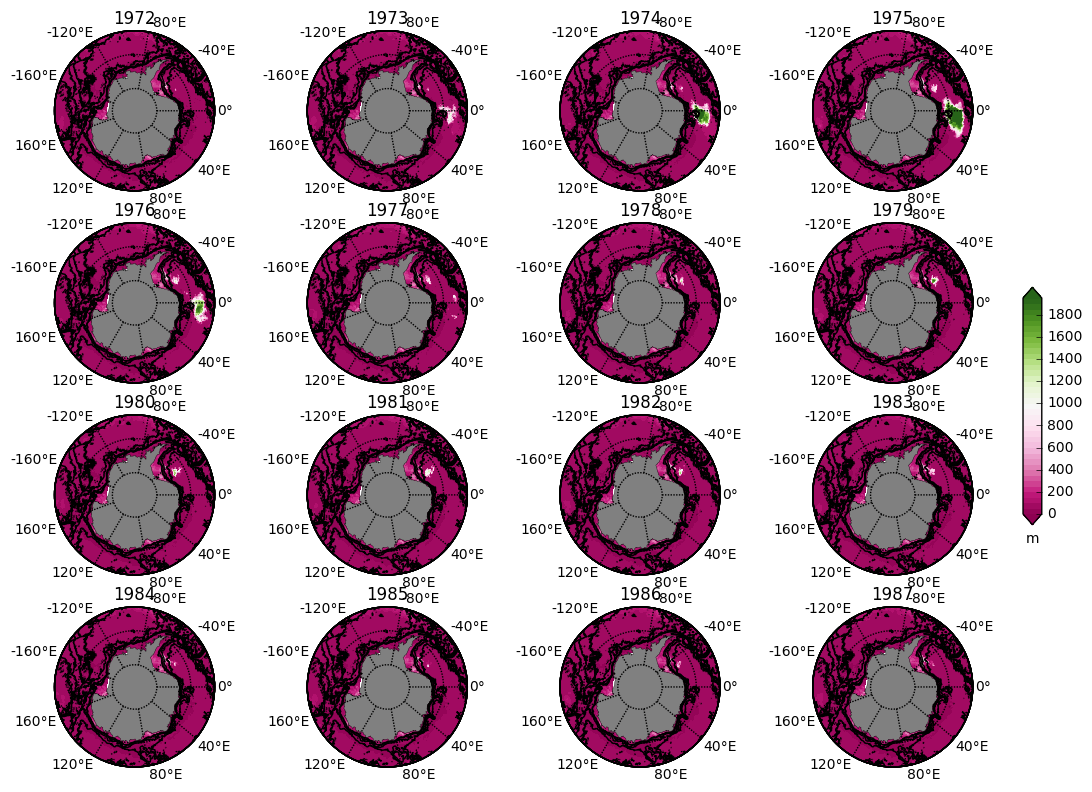

In [14]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(0,2000,50)
yrs=['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987']

plt.subplot(4,4,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_mld[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title(yrs[0])


ii=0
for yr in range(0,15):
    #print yr

    plt.subplot(4,4,yr+2)
    map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,pert_mld[yr], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    clev3 = np.arange(0,5000,1000)
    map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr+1])

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m')

of = os.path.join(NYFPertDir,'mld.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'mld.png')
plt.savefig(of,dpi=220)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/mld_1975anom.pdf


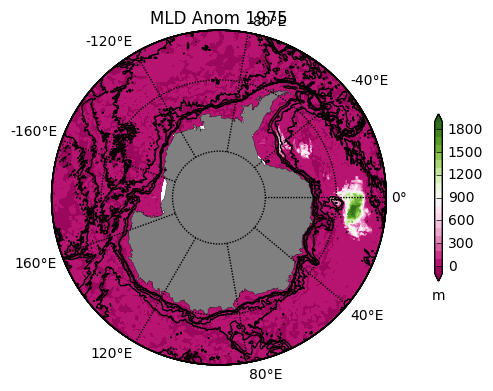

In [15]:
clev = np.arange(-100,2000,100)
plt.subplot(2,1,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pert_mld[3]-cntrl_mld[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('m')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('MLD Anom 1975')

of = os.path.join(NYFPertDir,'mld_1975anom.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'mld_1975anom.png')
plt.savefig(of,dpi=220)

## Calc the GMOC from ty_trans_rho 

In [16]:
Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans_rho.shape

pert_gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print pert_gmoc.shape

of=os.path.join(NYFPertDir,'gmoc_rho.npy')
a=np.save(of,pert_gmoc)



/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 80, 1080, 1440)
(20, 80, 1080)


In [21]:
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans_rho.shape

cntrl_gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_rho.npy')
a=np.save(of,cntrl_gmoc)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 80, 1080, 1440)
(20, 80, 1080)


In [5]:
#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_rho.npy')
pert_gmoc=np.load(of)
print pert_gmoc.shape

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_rho.npy')
cntrl_gmoc=np.load(of)
print cntrl_gmoc.shape



(20, 80, 1080)
(20, 80, 1080)


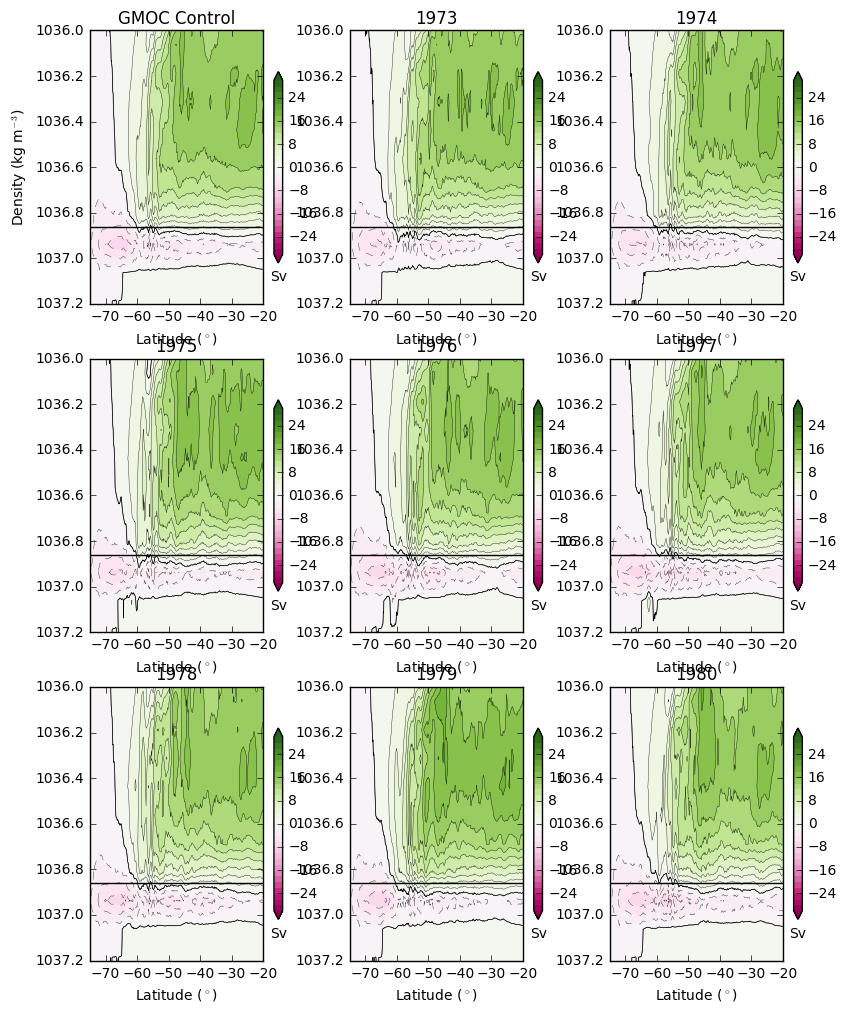

In [25]:
#plot gmoc in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30,32,2)

t1=0
t2=5

plt.subplot(331)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-20])
tit='GMOC Control'
plt.title(tit)
plt.plot([-75,-20], [1036.86,1036.86], 'k')

yrs=['1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992']

ii=0
for yr in range(0,8):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(3,3,yr+2)
    plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
    cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=clev,colors='k',linewidths=0.25)
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036))
    #plt.ylabel('Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,-20])
    tit='GMOC Perturbed Year ' +yrs[yr]
    plt.title(yrs[yr])
    plt.plot([-75,-20], [1036.86,1036.86], 'k')

    
#ax3 = plt.axes([0.92,0.38,0.015,0.25])
##cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('N/m^2')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc.png')
plt.savefig(of,dpi=220)

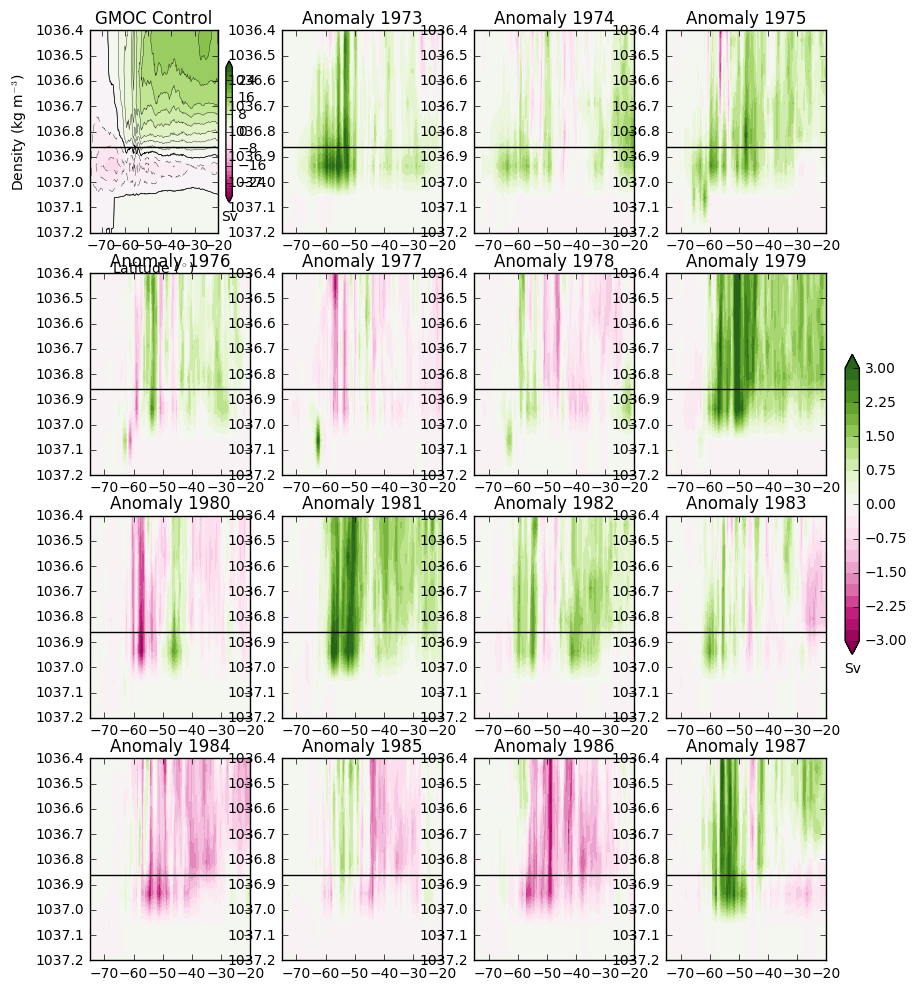

In [9]:
#plot gmoc anom in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30,32,2)

t1=0
t2=5

plt.subplot(441)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036.4))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-20])
tit='GMOC Control'
plt.title(tit)
plt.plot([-75,-20], [1036.86,1036.86], 'k')

yrs=['1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987']

ii=0

clev = np.arange(-3,3.25,0.25)


for yr in range(0,15):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(4,4,yr+2)
    p1=plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:]-np.mean(cntrl_gmoc[:,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    #plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:]-cntrl_gmoc[yr,:,:],levels=clev,colors='k',linewidths=0.25)
    #plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:]-cntrl_gmoc[yr,:,:],levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036.4))
    #plt.ylabel('Density (kg m$^{-3}$)')
    #plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,-20])
    tit='Anomaly ' + yrs[yr]
    plt.title(tit)
    plt.plot([-75,-20], [1036.86,1036.86], 'k')

    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc_anom.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_anom.png')
plt.savefig(of,dpi=220)

(50,)
10
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/gmoc_ts.pdf


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:65: VisibleDeprecationWarning: converting an array with ndim > 0 to an

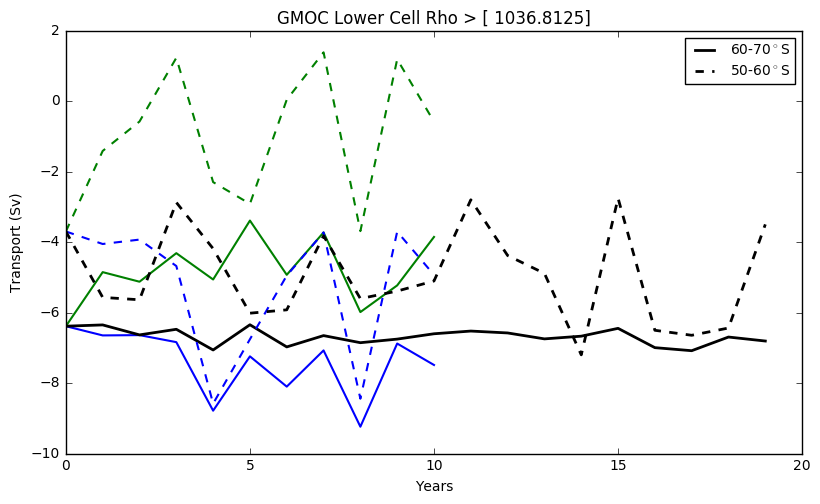

In [10]:
#plot time series of AABW
T=np.arange(50)
print T.shape


z1=np.argwhere(potrho<1036.86)
z1=z1[-1]

ts=pert_gmoc.shape
ts=ts[0]
print ts

# do lower cell average between lats 60-65S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=j1[-1]
j2=j2[-1]

lc_cntrl60_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl60_psj_bar = np.mean(lc_cntrl60_psj,2)
lc_cntrl60_psj_ts = np.min(lc_cntrl60_psj_bar,1)

lc_anom60_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]
lc_max_anom60_psj_ts = np.max(lc_anom60_psj,1)
lc_max_anom60_psj_ts = np.max(lc_max_anom60_psj_ts,1)
lc_max_anom60_psj_ts=np.insert(lc_max_anom60_psj_ts,0,0)
lc_max60_ts = lc_max_anom60_psj_ts + lc_cntrl60_psj_ts[0]

lc_min_anom60_psj_ts = np.min(lc_anom60_psj,1)
lc_min_anom60_psj_ts = np.min(lc_min_anom60_psj_ts,1)
lc_min_anom60_psj_ts=np.insert(lc_min_anom60_psj_ts,0,0)
lc_min60_ts = lc_min_anom60_psj_ts + lc_cntrl60_psj_ts[0]

#print lc_max_ts
#print lc_min_ts

# do lower cell average between lats 40-45S
j1=np.argwhere(yt_ocean<-49.9)
j2=np.argwhere(yt_ocean<-40)
j1=j1[-1]
j2=j2[-1]

lc_cntrl40_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl40_psj_bar = np.mean(lc_cntrl40_psj,2)
lc_cntrl40_psj_ts = np.min(lc_cntrl40_psj_bar,1)

lc_anom40_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]

lc_max_anom40_psj_ts = np.max(lc_anom40_psj,1)
lc_max_anom40_psj_ts = np.max(lc_max_anom40_psj_ts,1)
lc_max_anom40_psj_ts=np.insert(lc_max_anom40_psj_ts,0,0)
lc_max40_ts = lc_max_anom40_psj_ts + lc_cntrl40_psj_ts[0]

lc_min_anom40_psj_ts = np.min(lc_anom40_psj,1)
lc_min_anom40_psj_ts = np.min(lc_min_anom40_psj_ts,1)
lc_min_anom40_psj_ts=np.insert(lc_min_anom40_psj_ts,0,0)
lc_min40_ts = lc_min_anom40_psj_ts + lc_cntrl40_psj_ts[0]

# do lower cell average between lats 20-25S
j1=np.argwhere(yt_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=j1[-1]
j2=j2[-1]

lc_cntrl50_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl50_psj_bar = np.mean(lc_cntrl50_psj,2)
lc_cntrl50_psj_ts = np.min(lc_cntrl50_psj_bar,1)

lc_anom50_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]

lc_max_anom50_psj_ts = np.max(lc_anom50_psj,1)
lc_max_anom50_psj_ts = np.max(lc_max_anom50_psj_ts,1)
lc_max_anom50_psj_ts=np.insert(lc_max_anom50_psj_ts,0,0)
lc_max50_ts = lc_max_anom50_psj_ts + lc_cntrl50_psj_ts[0]

lc_min_anom50_psj_ts = np.min(lc_anom50_psj,1)
lc_min_anom50_psj_ts = np.min(lc_min_anom50_psj_ts,1)
lc_min_anom50_psj_ts=np.insert(lc_min_anom50_psj_ts,0,0)
lc_min50_ts = lc_min_anom50_psj_ts + lc_cntrl50_psj_ts[0]

plt.subplot(211)
plt.plot(lc_max60_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(lc_min60_ts,linestyle='-',color='b',linewidth=1.5)
plt.plot(lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-70$^\circ$S',linewidth=2)
plt.plot(lc_max50_ts,linestyle='--',color='g',linewidth=1.5)
plt.plot(lc_min50_ts,linestyle='--',color='b',linewidth=1.5)
plt.plot(lc_cntrl50_psj_ts,linestyle='--',color='k',label='50-60$^\circ$S',linewidth=2)
#plt.plot(lc_max40_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(lc_min40_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)


of = os.path.join(NYFPertDir,'gmoc_ts.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_ts.png')
plt.savefig(of,dpi=220)

In [25]:
#calc tx transport, acc transport
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tx_trans.shape

cntrl_psi=ff.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()
print cntrl_psi.shape

of=os.path.join(NYFCntrlDir,'psi.npy')
a=np.save(of,cntrl_psi)


#pert_psi=ff.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 1080, 1440)


In [28]:
#calc tx transport, acc transport
Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tx_trans.shape

pert_psi=ff.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()
print pert_psi.shape

of=os.path.join(NYFPertDir,'psi.npy')
a=np.save(of,pert_psi)



/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 1080, 1440)


In [29]:
#load acc psi
of=os.path.join(NYFPertDir,'psi.npy')
pert_psi=np.load(of)
print pert_psi.shape

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'psi.npy')
cntrl_psi=np.load(of)
print cntrl_psi.shape

(20, 1080, 1440)
(20, 1080, 1440)


[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]


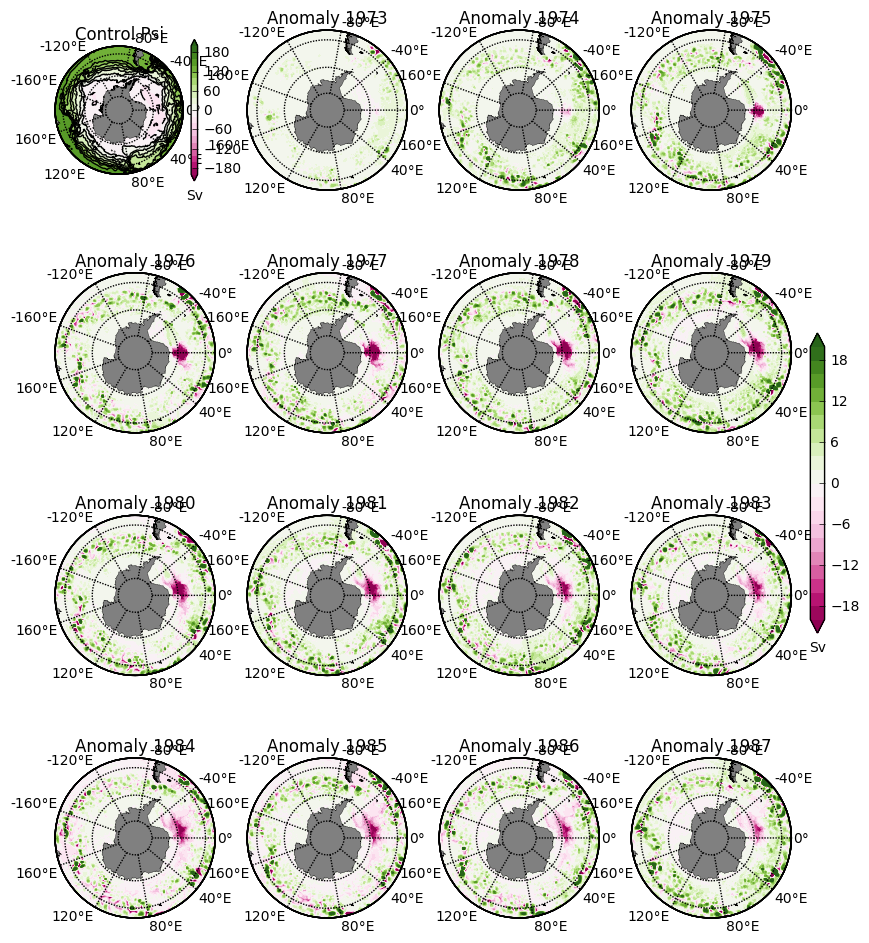

In [32]:
#plot gmoc anom in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#plot ACC transport
clev = np.linspace(-200,200,21)
print clev

plt.subplot(4,4,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(cntrl_psi[0:5],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Control Psi')


yrs=['1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987']

ii=0


clev = np.linspace(-20,20,21)

for yr in range(0,15):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(4,4,yr+2)
    map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,pert_psi[yr,:,:]-cntrl_psi[yr,:,:], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    #clev3 = np.arange(0,200,20)
    #print clev3
    #map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
    
    tit='Anomaly ' + yrs[yr]
    plt.title(tit)
    
    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc_anom.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'psi_anom.png')
plt.savefig(of,dpi=220)

[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]


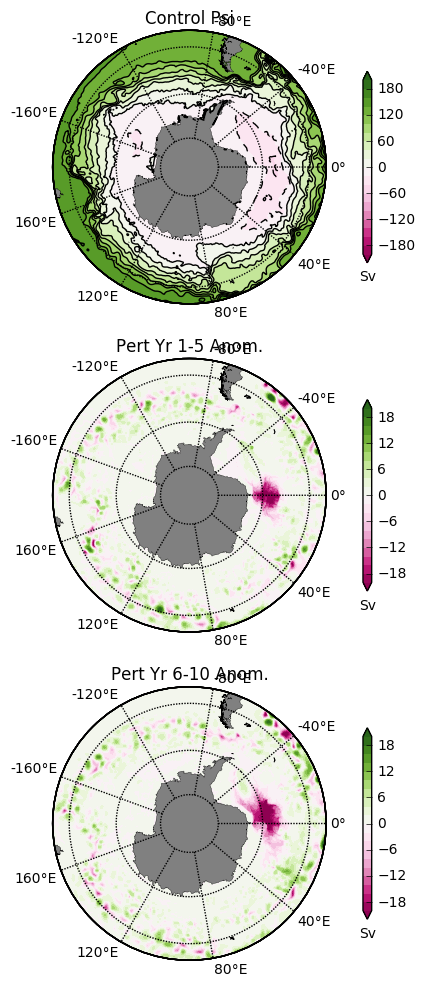

In [34]:
#plot ACC transport
clev = np.linspace(-200,200,21)
print clev

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(cntrl_psi[0:5],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Control Psi')

#ax3 = plt.axes([0.92,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#cb.ax.set_ylabel('Sv')

clev = np.linspace(-20,20,21)

plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(pert_psi[1:5],axis=0)-np.mean(cntrl_psi[5:9],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#p1=map.contourf(X,Y,np.mean(pert_psi[0:5],axis=0)-np.mean(cntrl_psi[0:5],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(pert_psi[0:5],axis=0)-np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Pert Yr 1-5 Anom.')

#ax3 = plt.axes([0.92,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#cb.ax.set_ylabel('Sv')

plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(pert_psi[5:10],axis=0)-np.mean(cntrl_psi[5:9],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(pert_psi[4:7],axis=0)-np.mean(cntrl_psi[4:7],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Pert Yr 6-10 Anom.')

#ax3 = plt.axes([0.92,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#cb.ax.set_ylabel('Sv')

#of = os.path.join(NYFPertDir,'psi.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'psi.png')
plt.savefig(of,dpi=220)

In [35]:
# do psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print j1, i1, i2

[239] [843] [851]


(50,)
[239] [843] [851]


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


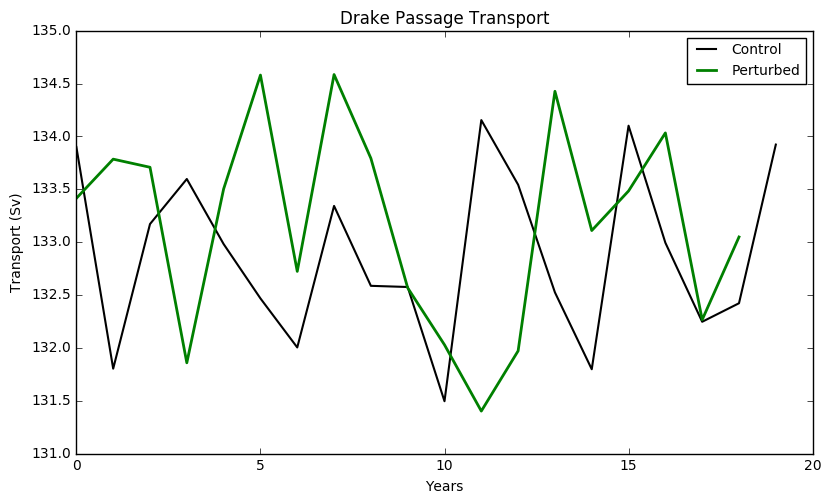

In [36]:
#plot Drake Passage time series
T=np.arange(50)
print T.shape

# do psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print j1, i1, i2

cntrl_dp = cntrl_psi[:,0:j1,i1:i2]
cntrl_dp_bar = np.mean(cntrl_dp,2)
cntrl_dp_ts = np.max(cntrl_dp_bar,1)

pert_dp = pert_psi[1:,0:j1,i1:i2]
pert_dp_bar = np.mean(pert_dp,2)
pert_dp_ts = np.max(pert_dp_bar,1)

plt.subplot(211)
plt.plot(cntrl_dp_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
plt.plot(pert_dp_ts,linestyle='-',color='g',label='Perturbed',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit=('Drake Passage Transport')
plt.title(tit)
plt.legend(fontsize=10)


#of = os.path.join(NYFPertDir,'dp_ts.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'dp_ts.png')
plt.savefig(of,dpi=220)

In [6]:
#plot temp
Ocean_File = os.path.join(NYFCntrlDir,'output50*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.temp.shape

#cntrl_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
cntrl_temp=ff.temp[:,:,0:500,:].mean('time').load()
print cntrl_temp.shape

#print xt_ocean[x1:x2]
Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.temp.shape

#pert_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
#print pert_ztemp.shape

pert_temp=ff.temp[:,:,0:500,:].load()
print pert_temp.shape


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output50*/ocean.nc
(9, 50, 1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


(50, 500, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 50, 500, 1440)


[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6
 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/temp_55m.pdf


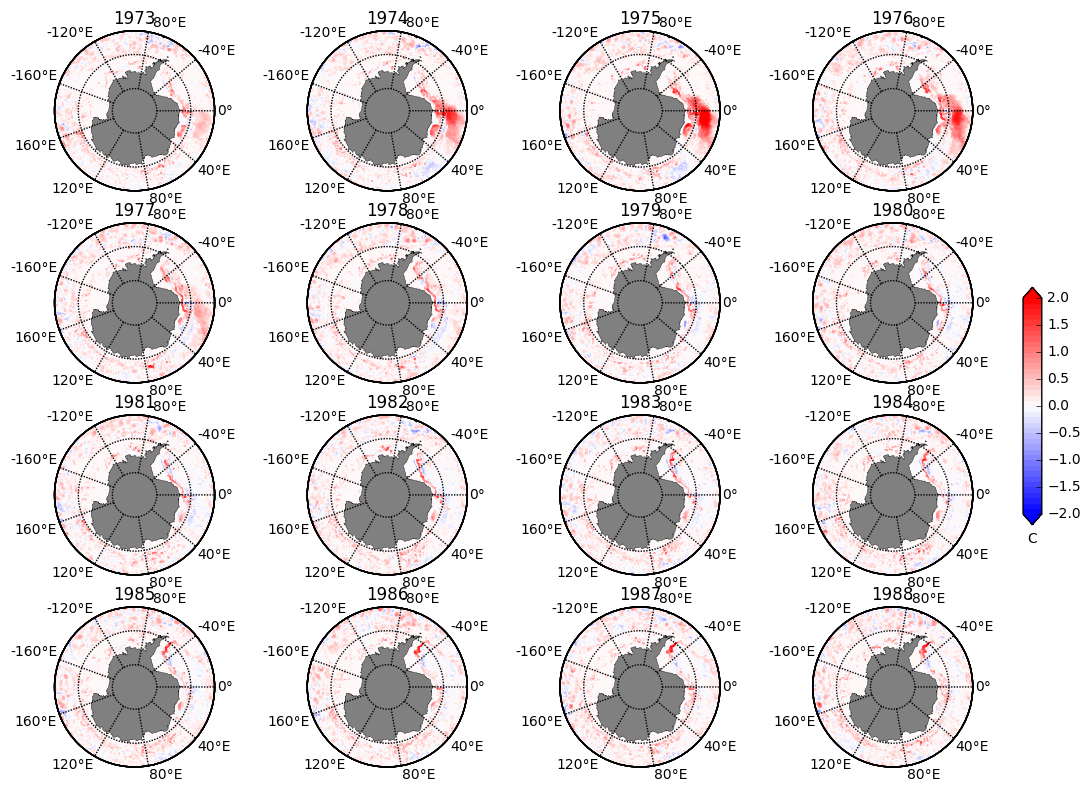

In [7]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

yrs=['1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992']

#plt.subplot(3,4,1)
#map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#X, Y = map(geolon_t,geolat_t) 
#p1=map.contourf(X,Y,cntrl_mld[5,:,:], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
##cb=plt.colorbar(orientation='vertical',shrink = 0.7)
##cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title(yrs[0])

clev = np.linspace(-2,2,41)
print clev

ii=0
for yr in range(0,16):
    #print yr

    plt.subplot(4,4,yr+1)
    map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
    p1=map.contourf(X,Y,pert_temp[yr,5,:,:]-cntrl_temp[5,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr])

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

#of = os.path.join(NYFPertDir,'temp_55m.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'temp_55m.png')
plt.savefig(of,dpi=220)



1497.56188965
[-0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.
  0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25
  0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5  ]


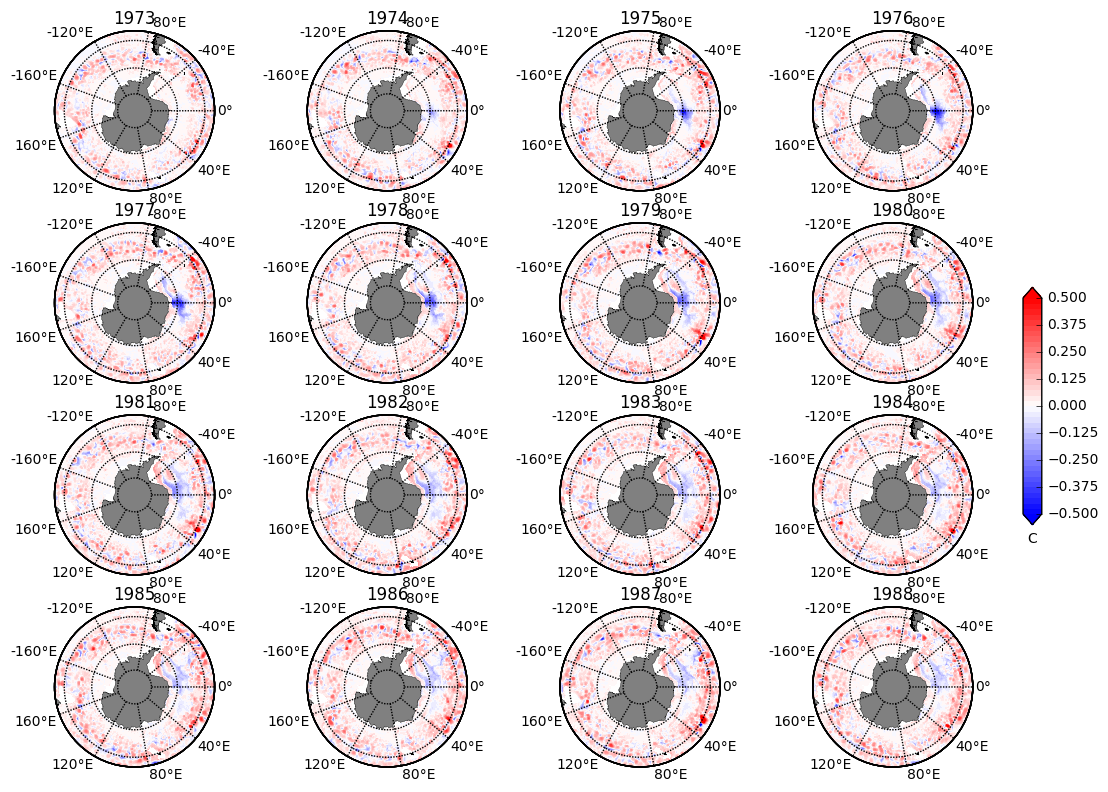

In [8]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

yrs=['1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992']

#plt.subplot(3,4,1)
#map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#X, Y = map(geolon_t,geolat_t) 
#p1=map.contourf(X,Y,cntrl_mld[5,:,:], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
##cb=plt.colorbar(orientation='vertical',shrink = 0.7)
##cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title(yrs[0])

print st_ocean[30]

clev = np.linspace(-.5,.5,41)
print clev

ii=0
for yr in range(0,16):
    #print yr

    plt.subplot(4,4,yr+1)
    map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
    p1=map.contourf(X,Y,pert_temp[yr,30,:,:]-cntrl_temp[30,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr])

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

#of = os.path.join(NYFPertDir,'temp_1500m.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'temp_1500m.png')
plt.savefig(of,dpi=220)



[-0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04 -0.02  0.    0.02
  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2 ]
3926.81274414


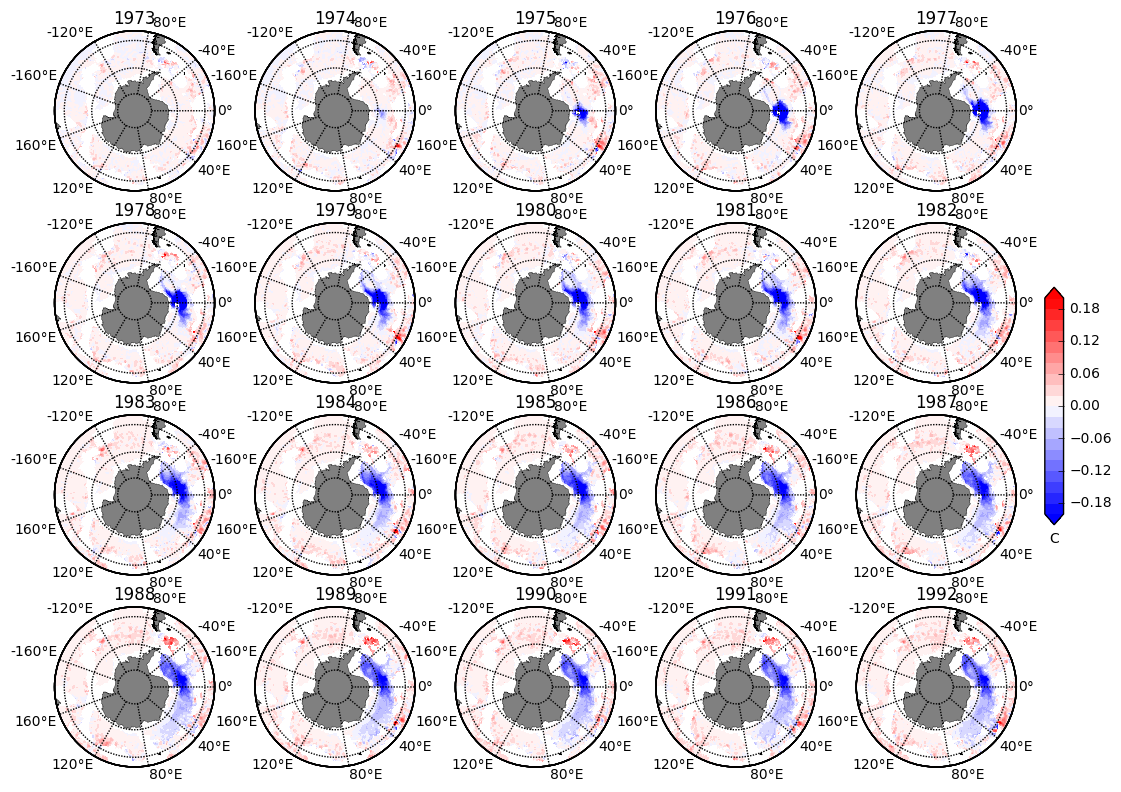

In [11]:
clev = np.linspace(-.2,.2,21)
print clev
print st_ocean[42]
ii=0
for yr in range(0,20):
    #print yr

    plt.subplot(4,5,yr+1)
    map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
    p1=map.contourf(X,Y,pert_temp[yr,42,:,:]-cntrl_temp[42,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr])
    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

#of = os.path.join(NYFPertDir,'temp_4000m.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'temp_4000m.png')
plt.savefig(of,dpi=220)


In [12]:
print st_ocean[42]

3926.81274414


In [14]:
#calc zonal average temp anomalies
#Plot zonal average temp anomaly across weddell
x1=np.argwhere(xt_ocean<-40)
x2=np.argwhere(xt_ocean<15)
x1=x1[-1]
x2=x2[-1]

y1=np.argwhere(yt_ocean<-65)
#y2=np.argwhere(xt_ocean<15)
y1=y1[-1]
#y2=y2[-1]
print x1, x2

#print xt_ocean[x1:x2]
#print yt_ocean[:y1]


[959] [1179]


(50, 500, 1440)
(20, 50, 500, 1440)
[-0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04 -0.02  0.    0.02
  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2 ]
3926.81274414


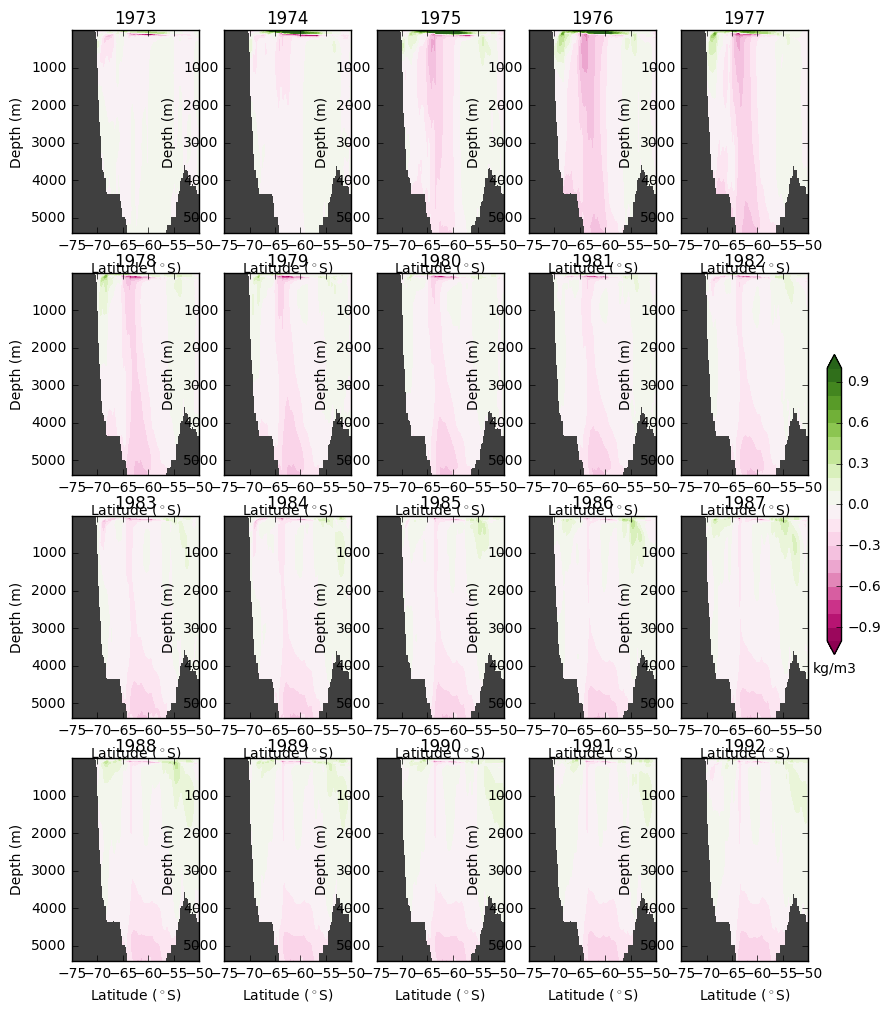

In [20]:
print cntrl_temp.shape
print pert_temp.shape

#plt.subplot(211)
#clev = np.arange(-2,20,1)
#plt.contourf(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Temp')
#plt.contour(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
##plt.gca().yaxis.set_major_formatter(x_formatter)
##plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
#plt.xlim([-75,-50])
#plt.title('Control Temp')

clev = np.linspace(-.2,.2,21)
print clev
print st_ocean[42]
ii=0
for yr in range(0,20):
    #print yr

    plt.subplot(4,5,yr+1)
    plt.gca().patch.set_color('.25')
    clev = np.arange(-1,1.1,0.1)
    p1=plt.contourf(yt_ocean[0:500],st_ocean,np.mean(pert_temp[yr,:,:,x1:x2],axis=2)-np.mean(cntrl_temp[:,:,x1:x2],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('kg/m3')
    #plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
    #plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    #plt.gca().yaxis.set_major_formatter(x_formatter)
    #plt.ylim((1037.5,1034))
    plt.ylabel('Depth (m)')
    plt.xlabel('Latitude ($^\circ$S)')
    plt.xlim([-75,-50])
    plt.title(yrs[yr])
    #plt.title('40W to 15E Temp Anomaly 1976')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('kg/m3')

#plt.subplot(224)
#plt.gca().patch.set_color('.25')
#clev = np.arange(-.5,.51,0.1)
#plt.contourf(yt_ocean[0:500],st_ocean,np.mean(pert_temp[9,:,:,:],axis=2)-np.mean(cntrl_temp[:,:,:],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.title('180W to 180E Temp Anomaly 1982')

#of = os.path.join(NYFPertDir,'zavTanom.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'zavTanom.png')
plt.savefig(of,dpi=220)

In [17]:
#plot density
Ocean_File = os.path.join(NYFCntrlDir,'output50*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.pot_rho_0.shape

#cntrl_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
cntrl_pot_rho_0=ff.pot_rho_0[:,:,0:500,:].mean('time').load()
print cntrl_pot_rho_0.shape

#print xt_ocean[x1:x2]
Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.pot_rho_0.shape

#pert_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
#print pert_ztemp.shape

pert_pot_rho_0=ff.pot_rho_0[:,:,0:500,:].load()
print pert_pot_rho_0.shape

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output50*/ocean.nc
(9, 50, 1080, 1440)
(50, 500, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 50, 500, 1440)


In [ ]:
## Calc the AMOC from ty_trans for forcing cases

(1080, 1440)
[-2 -1  0  1]


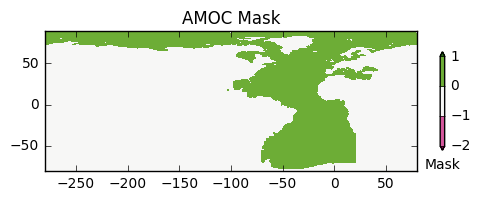

In [6]:
#calculate the AMOC mask
#-1 is Atl and Arctic, all other ocean is -2, land is 0
#reset to 1 and 0
msk_file='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc'
nc = Dataset(msk_file, mode='r') # file handle, open in read only mode
msk= nc.variables['kmt'][:]
nc.close() # close the file
print msk.shape
msk[np.where(msk<-1)]=0
msk[np.where(msk==-1)]=1

clev = np.arange(-2,2,1)
print clev

plt.subplot(211)
plt.contourf(geolon_t,geolat_t,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Mask')
plt.title('AMOC Mask')

In [7]:
#do AMOC in zspace
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans.shape

#tt=ff.ty_trans[1,:,500,500].load()
#print 'no mask', tt

ty=ff.ty_trans*msk
print ty.shape
#tt=ty[1,:,500,500].load()
#print 'mask',tt

cntrl_amoc=ty[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()

of=os.path.join(NYFCntrlDir,'amoc_z.npy')
a=np.save(of,cntrl_amoc)

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 50, 1080, 1440)


In [8]:
#do AMOC in zspace
Ocean_File = os.path.join(NYFPertDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans.shape

#tt=ff.ty_trans[1,:,500,500].load()
#print 'no mask', tt

ty=ff.ty_trans*msk
print ty.shape
#tt=ty[1,:,500,500].load()
#print 'mask',tt

pert_amoc=ty[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()

of=os.path.join(NYFPertDir,'amoc_z.npy')
a=np.save(of,pert_amoc)

/g/data1/v45/pas561/mom/archive/gfdl_nyf_wp2/output5*/ocean.nc
(10, 50, 1080, 1440)
(10, 50, 1080, 1440)


In [9]:
of=os.path.join(NYFPertDir,'amoc_z.npy')
pert_amoc=np.load(of)
print pert_amoc.shape

of=os.path.join(NYFCntrlDir,'amoc_z.npy')
cntrl_amoc=np.load(of)
print cntrl_amoc.shape


(10, 50, 1080)
(20, 50, 1080)


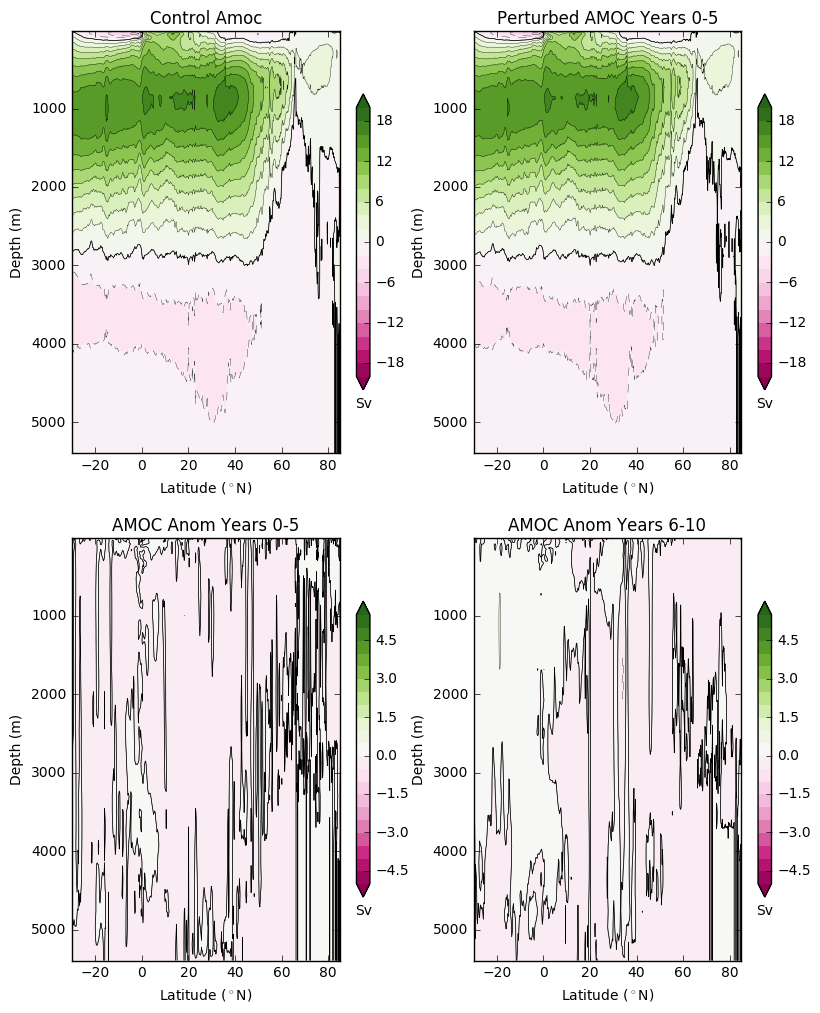

In [10]:
#Amoc in Z space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,22,2)

plt.subplot(221)
plt.contourf(yu_ocean,st_ocean,np.mean(cntrl_amoc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_amoc,axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_amoc,axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='Control Amoc'
plt.title(tit)

t1=0
t2=5

plt.subplot(222)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='Perturbed AMOC Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=0
t2=5

clev = np.arange(-5,6,.5)

plt.subplot(223)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='AMOC Anom Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=6
t2=10

plt.subplot(224)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc,axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc[t1:t2,:,:],axis=0)-np.mean(cntrl_amoc,axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='AMOC Anom Years '+str(t1)+'-'+str(t2)
plt.title(tit)


(14,)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: converting an array with ndim > 0 to an

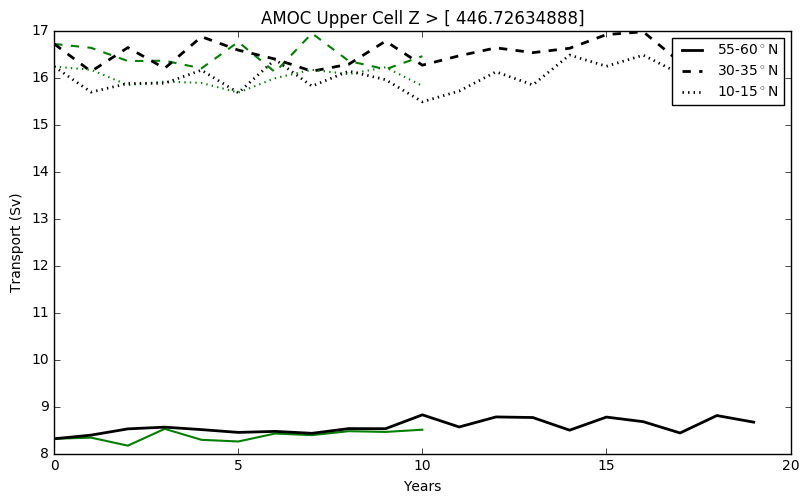

In [11]:
#plot time series of AMOC in z space
T=np.arange(14)
print T.shape


# do lower cell average between lats 55-60N
j1=np.argwhere(yt_ocean<55)
j2=np.argwhere(yt_ocean<60)
j1=j1[-1]
j2=j2[-1]

z1=np.argwhere(st_ocean<500)
z1=z1[-1]

uc_cntrl50_psj = cntrl_amoc[:,z1:,j1:j2]
uc_cntrl50_psj_bar = np.mean(uc_cntrl50_psj,2)
uc_cntrl50_psj_ts = np.max(uc_cntrl50_psj_bar,1)

uc_pert50_psj = pert_amoc[:,z1:,j1:j2]
uc_pert50_psj_bar = np.mean(uc_pert50_psj,2)
uc_pert50_psj_ts = np.max(uc_pert50_psj_bar,1)
uc_pert50_psj_ts=np.insert(uc_pert50_psj_ts,0,uc_cntrl50_psj_ts[0])


# do lower cell average between lats 40-45N
j1=np.argwhere(yt_ocean<30)
j2=np.argwhere(yt_ocean<35)
j1=j1[-1]
j2=j2[-1]

uc_cntrl40_psj = cntrl_amoc[:,z1:,j1:j2]
uc_cntrl40_psj_bar = np.mean(uc_cntrl40_psj,2)
uc_cntrl40_psj_ts = np.max(uc_cntrl40_psj_bar,1)

uc_pert40_psj = pert_amoc[:,z1:,j1:j2]
uc_pert40_psj_bar = np.mean(uc_pert40_psj,2)
uc_pert40_psj_ts = np.max(uc_pert40_psj_bar,1)
uc_pert40_psj_ts=np.insert(uc_pert40_psj_ts,0,uc_cntrl40_psj_ts[0])

# do lower cell average between lats 20-25N
j1=np.argwhere(yt_ocean<10)
j2=np.argwhere(yt_ocean<15)
j1=j1[-1]
j2=j2[-1]

uc_cntrl20_psj = cntrl_amoc[:,z1:,j1:j2]
uc_cntrl20_psj_bar = np.mean(uc_cntrl20_psj,2)
uc_cntrl20_psj_ts = np.max(uc_cntrl20_psj_bar,1)

uc_pert20_psj = pert_amoc[:,z1:,j1:j2]
uc_pert20_psj_bar = np.mean(uc_pert20_psj,2)
uc_pert20_psj_ts = np.max(uc_pert20_psj_bar,1)
uc_pert20_psj_ts=np.insert(uc_pert20_psj_ts,0,uc_cntrl20_psj_ts[0])


plt.subplot(211)
plt.plot(uc_pert50_psj_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(uc_cntrl50_psj_ts,linestyle='-',color='k',label='55-60$^\circ$N',linewidth=2)
plt.plot(uc_pert40_psj_ts,linestyle='--',color='g',linewidth=1.5)
plt.plot(uc_cntrl40_psj_ts,linestyle='--',color='k',label='30-35$^\circ$N',linewidth=2)
plt.plot(uc_pert20_psj_ts,linestyle=':',color='g',linewidth=1.5)
plt.plot(uc_cntrl20_psj_ts,linestyle=':',color='k',label='10-15$^\circ$N',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='AMOC Upper Cell Z > ' +str(st_ocean[z1])
plt.title(tit)
plt.legend(fontsize=10)

In [ ]:
print np.max(fh[540:1080,:])
print np.min(fh[540:1080,:])

In [ ]:
#Hov of Sea Ice Conc. in Southern Ocean
print xt_ocean[1040]
print xt_ocean[878]

Ocean_File = os.path.join(CntrlDir,'output5*/ice_month.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
nyf_cn=ff.CN[:,:,:,878:1040].sum('ct').mean('xt').load()
print nyf_cn.shape

Ocean_File = os.path.join(PertDir,'output*/ice_month.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
pert_cn=ff.CN[:,:,:,878:1040].sum('ct').mean('xt').load()
print pert_cn.shape


In [ ]:
print nyf_cn.shape
print pert_cn.shape
cn = np.concatenate((nyf_cn[0:12,:],pert_cn),axis=0)
print cn.shape

time = np.arange(-12,192,1)
#print time
print time.shape

print xt_ocean[1040]
print xt_ocean[878]

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(0,1.0,11)
print clev

plt.subplot(211)
plt.contourf(time,yt_ocean,cn.T,cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Concentration')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
#plt.xlim([-75,85])
plt.title('Strong/Shift Weddell Sea Sea Ice Concentration')